Инициализация необходимых библиотек

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import seaborn as sb
import folium
import plotly.express as px

Задание 1: Использование основных типов графиков.  
Используйте набор данных о продажах автомобилей (https://www.kaggle.com/nehalbirla/vehicle-dataset-from-cardekho) и создайте различные типы графиков, чтобы отобразить различные аспекты данных.  
Включите: столбчатые диаграммы, гистограммы, линейные графики, диаграммы размаха, ящик с усами, радиальные диаграммы, scatter plot.

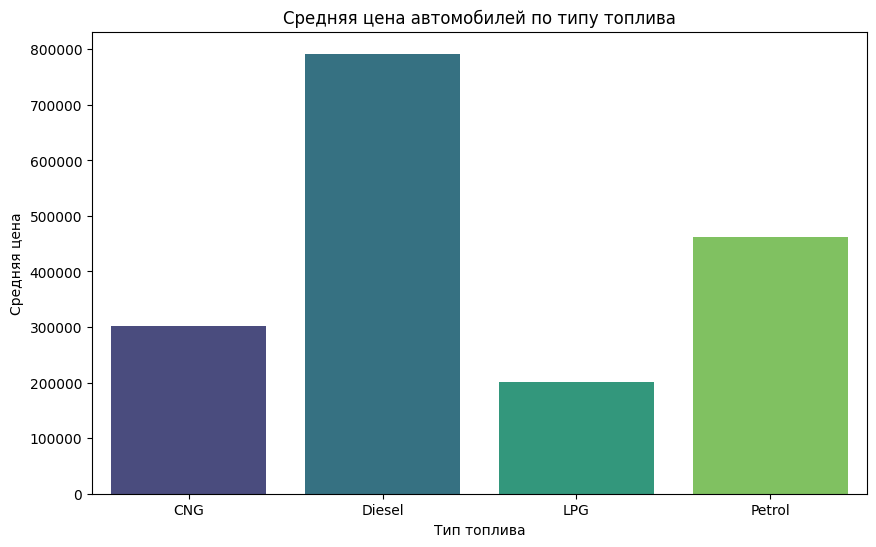

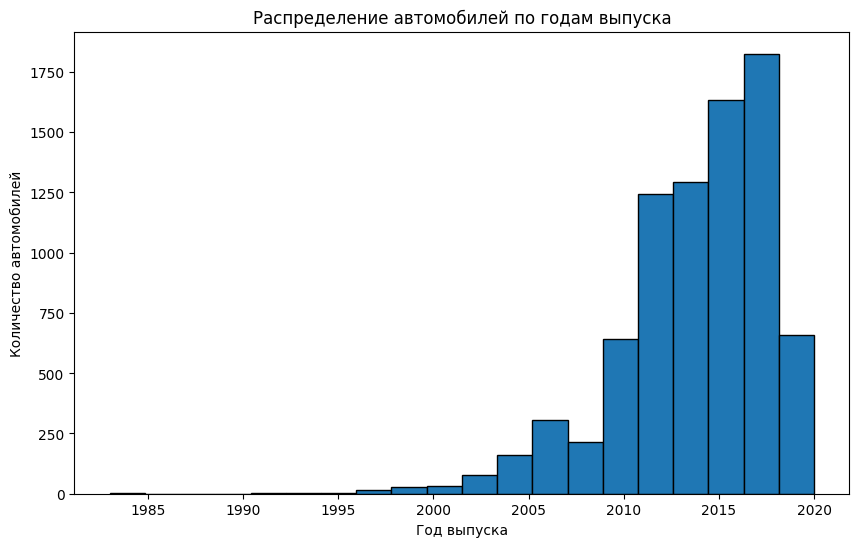

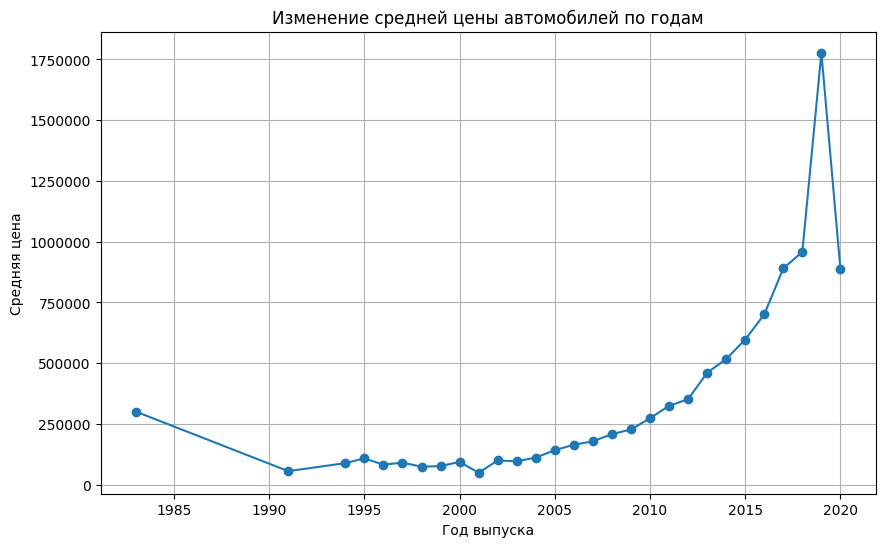

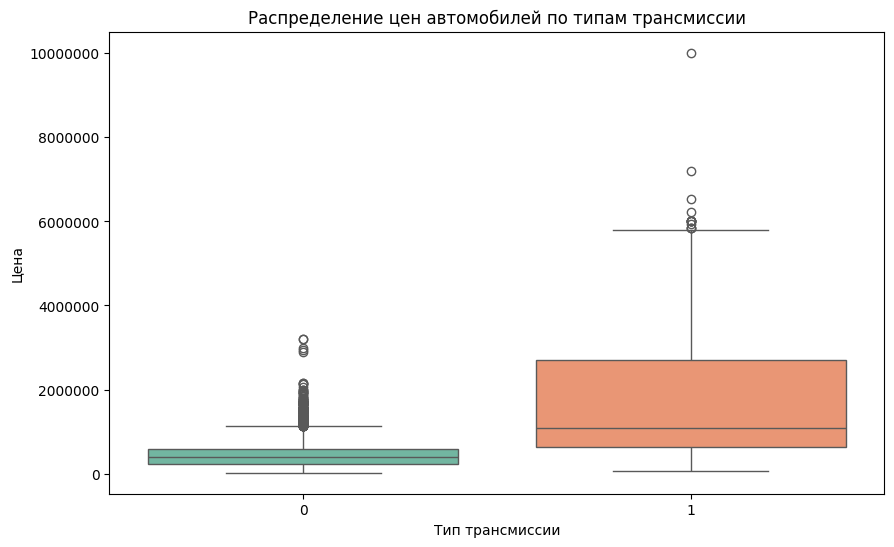

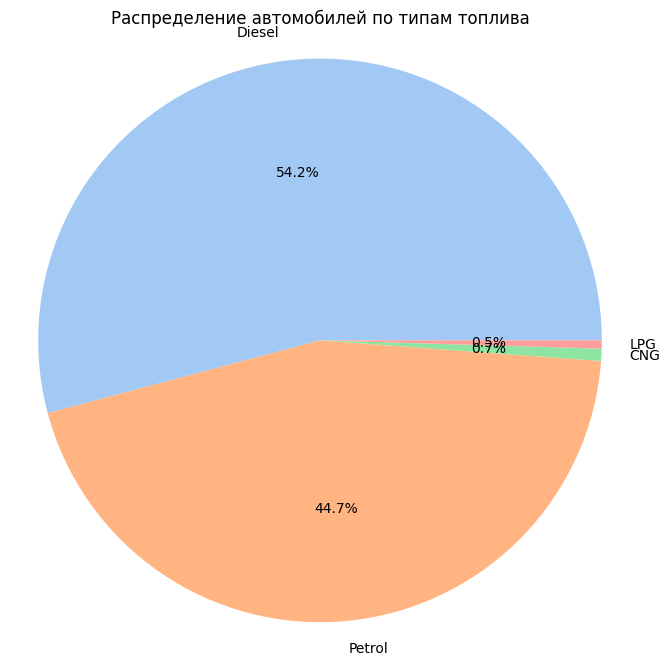

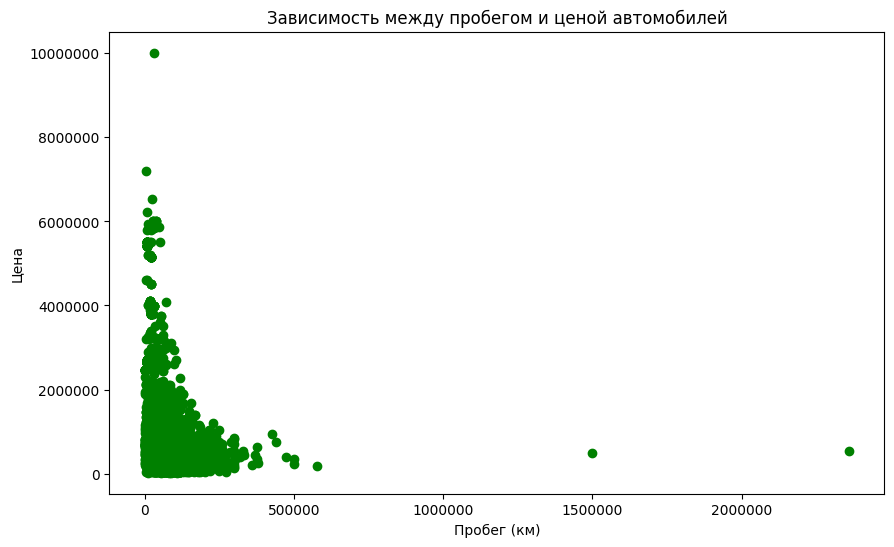

In [2]:
data_task_1 = pd.read_csv('Data/Car details v3.csv')

# Группировка данных по типу топлива и расчет среднего значения цены
avg_price_by_fuel = data_task_1.groupby('fuel')['selling_price'].mean().reset_index()
# Построение столбчатой диаграммы (selling_price по разным типам fuel)
plt.figure(figsize=(10, 6))
sb.barplot(x='fuel', y='selling_price', hue='fuel', data=avg_price_by_fuel, palette='viridis')
plt.title('Средняя цена автомобилей по типу топлива')
plt.xlabel('Тип топлива')
plt.ylabel('Средняя цена')
plt.show()

# Построение гистограммы для распределения количества машин по годам выпуска
plt.figure(figsize=(10, 6))
plt.hist(data_task_1['year'], bins=20, edgecolor='black')
plt.title('Распределение автомобилей по годам выпуска')
plt.xlabel('Год выпуска')
plt.ylabel('Количество автомобилей')
plt.show()

# Группировка данных по году и расчет среднего значения цены
avg_price_by_year = data_task_1.groupby('year')['selling_price'].mean().reset_index()
# Построение линейного графика для отображения изменения средней цены по годам выпуска
plt.figure(figsize=(10, 6))
plt.plot(avg_price_by_year['year'], avg_price_by_year['selling_price'], marker='o')
plt.title('Изменение средней цены автомобилей по годам')
plt.xlabel('Год выпуска')
plt.ylabel('Средняя цена')
plt.grid(True)
# Устанавливаем формат осей, чтобы не отображать экспоненциальные числа
plt.gca().xaxis.set_major_formatter(mticker.ScalarFormatter(useOffset=False))
plt.gca().xaxis.get_major_formatter().set_scientific(False)
plt.gca().yaxis.set_major_formatter(mticker.ScalarFormatter(useOffset=False))
plt.gca().yaxis.get_major_formatter().set_scientific(False)
plt.show()

# Построение ящика с усами для распределения цен по разным типам трансмиссии
plt.figure(figsize=(10, 6))
sb.boxplot(x='transmission', y='selling_price', hue='transmission', data=data_task_1, palette='Set2')
plt.title('Распределение цен автомобилей по типам трансмиссии')
plt.xlabel('Тип трансмиссии')
plt.ylabel('Цена')
# Устанавливаем формат осей, чтобы не отображать экспоненциальные числа
plt.gca().xaxis.set_major_formatter(mticker.ScalarFormatter(useOffset=False))
plt.gca().xaxis.get_major_formatter().set_scientific(False)
plt.gca().yaxis.set_major_formatter(mticker.ScalarFormatter(useOffset=False))
plt.gca().yaxis.get_major_formatter().set_scientific(False)
plt.show()

# Подсчет количества автомобилей по типам топлива
fuel_counts = data_task_1['fuel'].value_counts()
# Построение радиальной диаграммы для распределения автомобилей по типу топлива
plt.figure(figsize=(8, 8))
plt.pie(fuel_counts, labels=fuel_counts.index, autopct='%1.1f%%', colors=sb.color_palette("pastel"))
plt.title('Распределение автомобилей по типам топлива')
plt.axis('equal')  # Убедиться, что круг правильной формы
plt.show()

# Построение точечной диаграммы (scatter plot) для зависимости между пробегом и ценой
plt.figure(figsize=(10, 6))
plt.scatter(data_task_1['km_driven'], data_task_1['selling_price'], color='green')
plt.title('Зависимость между пробегом и ценой автомобилей')
plt.xlabel('Пробег (км)')
plt.ylabel('Цена')
# Устанавливаем формат осей, чтобы не отображать экспоненциальные числа
plt.gca().xaxis.set_major_formatter(mticker.ScalarFormatter(useOffset=False))
plt.gca().xaxis.get_major_formatter().set_scientific(False)
plt.gca().yaxis.set_major_formatter(mticker.ScalarFormatter(useOffset=False))
plt.gca().yaxis.get_major_formatter().set_scientific(False)
plt.show()


Задание 2: Создание тепловой карты корреляции.  
Используйте набор данных о погоде (https://www.kaggle.com/selfishgene/historical-hourly-weather-data) и с помощью библиотеки seaborn создайте тепловую карту, чтобы отобразить корреляцию между различными параметрами погоды.

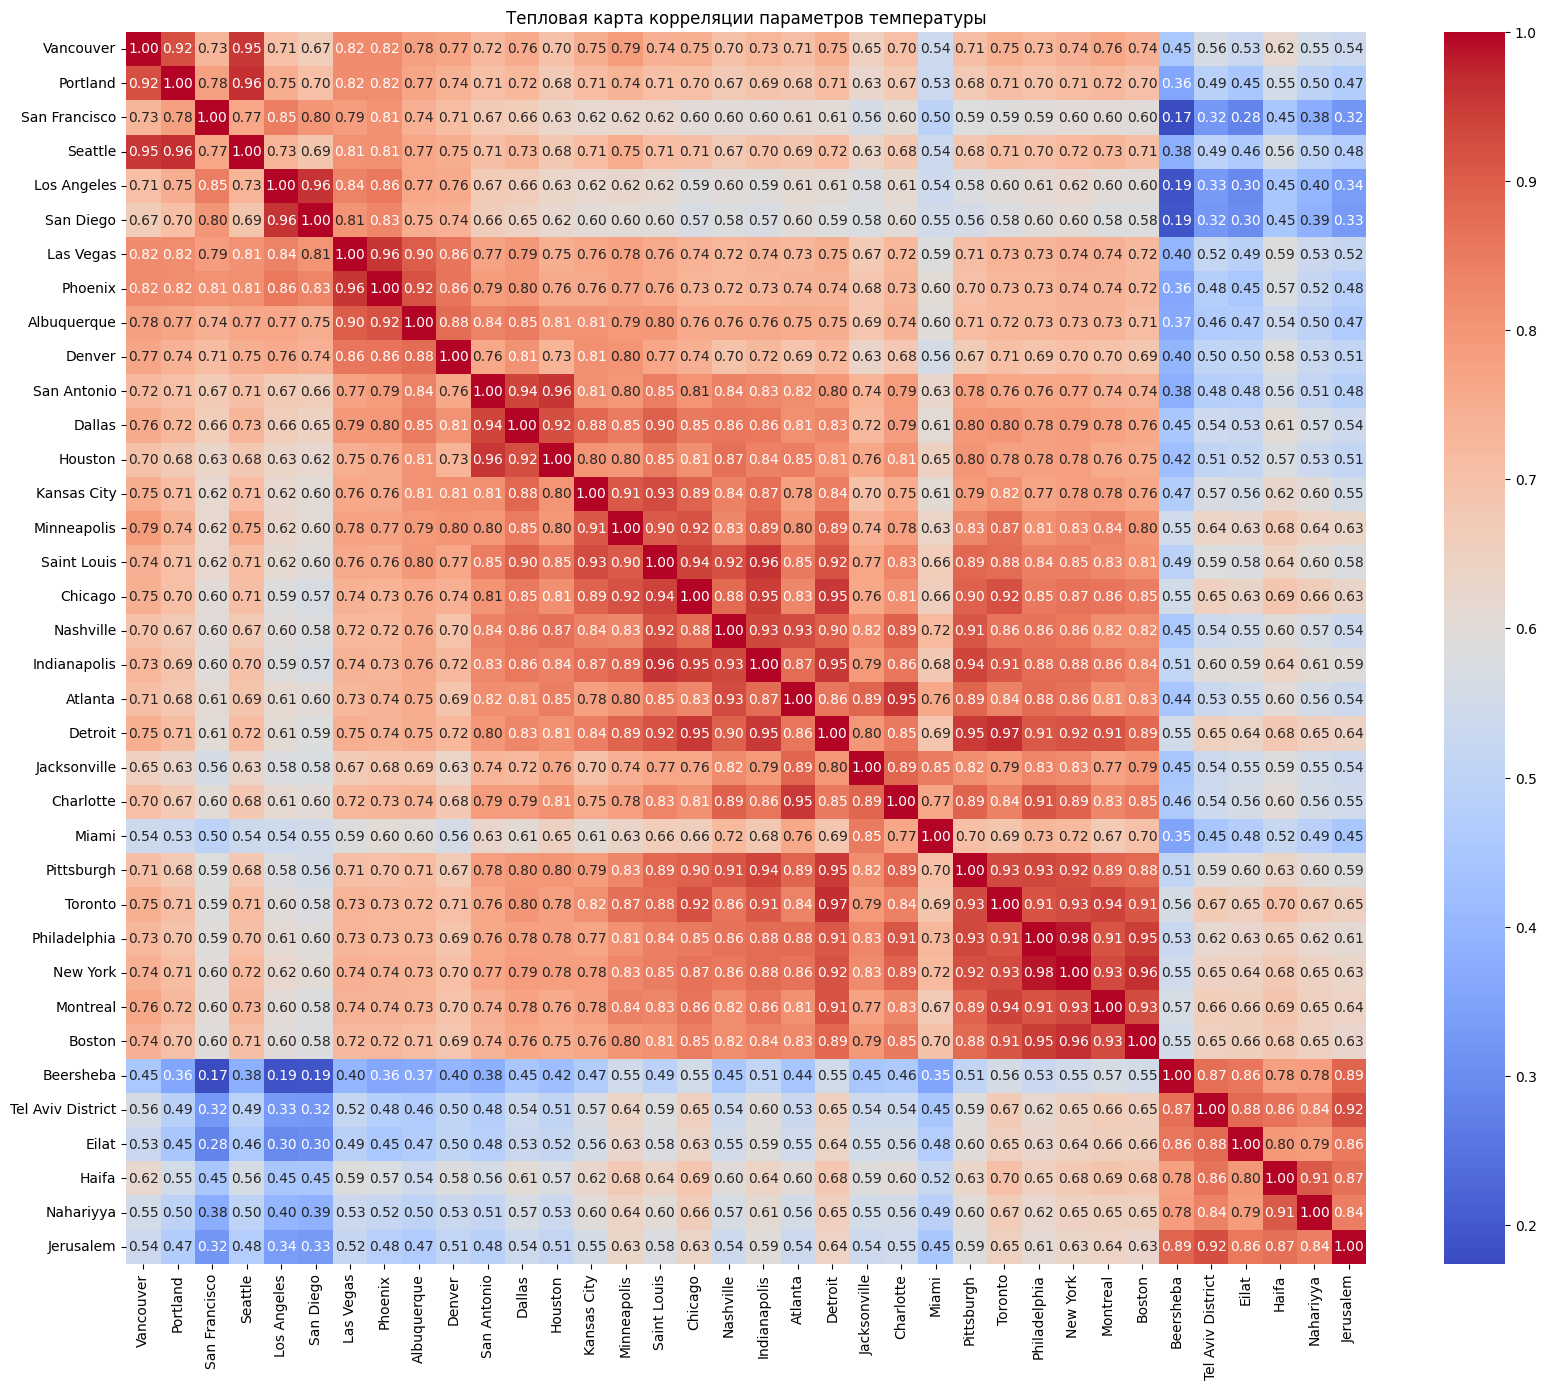

In [3]:
data_task_2 = pd.read_csv('Data/temperature.csv')

# Отбор числовых столбцов
numeric_data = data_task_2.select_dtypes(include=['float64', 'int64'])
# Построение корреляционной матрицы
correlation_matrix = numeric_data.corr()

plt.figure(figsize=(20, 16))
sb.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Тепловая карта корреляции параметров температуры')
plt.show()


Задание 3: Использование plotly для создания интерактивных графиков.  
Скачайте набор данных о выборах (например, https://www.kaggle.com/datasets/imoore/2020-us-general-election-turnout-rates) и используйте Plotly для создания интерактивных графиков, таких как интерактивные карты или диаграммы с подсказками.

In [9]:
data_task_3 = pd.read_csv('Data/2020 November General Election - Turnout Rates.csv')

# Отберем необходимые столбцы
data = data_task_3[['State', 'Total Ballots Counted (Estimate)', 'VEP Turnout Rate', 'Voting-Eligible Population (VEP)', 'State Abv']]
data = data.dropna()  # Удаляем строки с пропущенными значениями

# Создание интерактивной карты явки на выборы по штатам
fig = px.choropleth(
    data_frame=data,
    locations="State Abv",  # Используем сокращения штатов для отображения
    locationmode='USA-states',  # Режим отображения штатов США
    color="VEP Turnout Rate",  # Цветовая шкала на основе процента явки
    hover_name="State",  # Название штата при наведении
    hover_data={"Voting-Eligible Population (VEP)", "Total Ballots Counted (Estimate)", "VEP Turnout Rate"},  # Дополнительная информация при наведении
    scope="usa",  # Масштаб карты (США)
    title="Явка на выборах в США 2020 по штатам",
    color_continuous_scale='Viridis'  # Цветовая схема
)
fig.show()

fig_bar = px.bar(
    data_frame=data,
    x="State",
    y="VEP Turnout Rate",
    hover_data=["Voting-Eligible Population (VEP)", "Total Ballots Counted (Estimate)"],
    title="Процент явки на выборах по штатам",
    labels={"VEP Turnout Rate": "Процент явки (%)"},
    color="VEP Turnout Rate",  # Цветовая шкала на основе процента явки
    color_continuous_scale="Viridis"
)

fig_bar.update_layout(xaxis={'categoryorder': 'total descending'})  # Сортировка по убыванию процента явки
fig_bar.show()

Задание 4: Создание визуализаций временных рядов.  
Возьмите набор данных о COVID-19 от Джона Хопкинса (https://github.com/CSSEGISandData/COVID-19) и создайте визуализации временных рядов для показа изменения числа случаев заражения и смертей по времени.


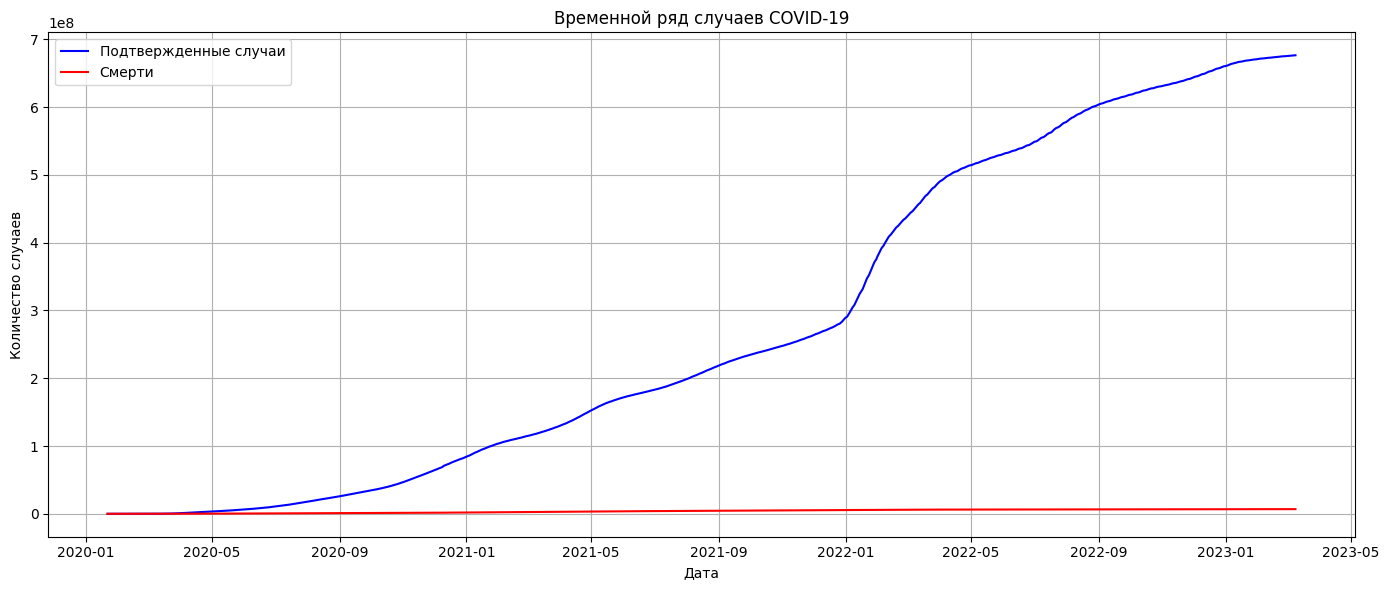

In [5]:
confirmed_df = pd.read_csv('Data/time_series_covid19_confirmed_global.csv')
deaths_df = pd.read_csv('Data/time_series_covid19_deaths_global.csv')

# Суммируем количество случаев по всем странам на каждый день
confirmed_df = confirmed_df.drop(columns=['Province/State', 'Country/Region', 'Lat', 'Long'])
confirmed_time_series = confirmed_df.sum(axis=0)

deaths_df = deaths_df.drop(columns=['Province/State', 'Country/Region', 'Lat', 'Long'])
deaths_time_series = deaths_df.sum(axis=0)

# Преобразуем индексы в формат даты
confirmed_time_series.index = pd.to_datetime(confirmed_time_series.index, format='%m/%d/%y')
deaths_time_series.index = pd.to_datetime(deaths_time_series.index, format='%m/%d/%y')

plt.figure(figsize=(14, 6))

# Визуализация подтвержденных случаев
plt.plot(confirmed_time_series, label='Подтвержденные случаи', color='blue')
# Визуализация случаев смертей
plt.plot(deaths_time_series, label='Смерти', color='red')

# Настройки графика
plt.title('Временной ряд случаев COVID-19')
plt.xlabel('Дата')
plt.ylabel('Количество случаев')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

Задание 5: Использование географической визуализации.  
С использованием набора данных о террористических атаках (https://www.kaggle.com/START-UMD/gtd) создайте географическую визуализацию для показа, где происходят террористические атаки по миру, используя библиотеку Folium или Geopandas.


In [6]:
data_task_5 = pd.read_csv('Data/globalterrorismdb_0718dist.csv', encoding='ISO-8859-1', low_memory=False)

# Отбор только необходимых столбцов
data = data_task_5[['iyear', 'imonth', 'iday', 'country_txt', 'region_txt', 'latitude', 'longitude', 'attacktype1_txt', 'nkill', 'nwound']]
data = data.dropna(subset=['latitude', 'longitude'])  # Удаляем строки без координат

# Создаем базовую карту с центром в середине карты мира
world_map = folium.Map(location=[0, 0], zoom_start=2)

# Добавляем точки террористических атак на карту
for idx, row in data.iterrows():
    folium.CircleMarker(
        location=[row['latitude'], row['longitude']],
        radius=3,
        popup=(f"Год: {row['iyear']}<br>"
               f"Страна: {row['country_txt']}<br>"
               f"Регион: {row['region_txt']}<br>"
               f"Тип атаки: {row['attacktype1_txt']}<br>"
               f"Погибло: {row['nkill']}<br>"
               f"Ранено: {row['nwound']}"),
        color='red',
        fill=True,
        fill_color='red'
    ).add_to(world_map)

# Сохранение карты в HTML-файл
world_map.save("terrorist_attacks_map.html")
